# Data Import, Cleaning and Formatting

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [8]:
%matplotlib inline

In [9]:
data_url = 'MOOC_Daten_Energiefahrrad_Updated.csv'
df = pd.read_csv(data_url,delimiter=',')

C:\Users\aarya\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# Peek at initial data load characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207557 entries, 0 to 207556
Data columns (total 7 columns):
Session ID            207557 non-null object
Session Start Time    207557 non-null object
User ID               207557 non-null int64
Sex                   207548 non-null object
Age                   207557 non-null int64
PeakPower             207557 non-null float64
Energy                207557 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.1+ MB


The bike dataset has 207,557 records.

In [11]:
# rename columns
#df = df.rename(columns={'PeakPower[0]':'PeakPowerWatts','Energy[0]':'EnergykWh'})

In [12]:
# Transform string to date, specify European format
#df['Session Start Time'] = pd.to_datetime(df['Session Start Time'],dayfirst=True)

In [14]:
df.head()

,Session ID,Session Start Time,User ID,Sex,Age,PeakPower,Energy
0,89677,2010-01-01 10:14:00,17696,m,14,324.81,0.00194
1,89678,2010-01-01 10:16:00,17697,f,14,291.89,0.00204
2,89679,2010-01-01 10:18:00,17698,f,46,321.14,0.00237
3,89685,2010-01-01 10:27:00,17701,f,38,396.33,0.00243
4,89688,2010-01-01 10:30:00,17703,m,46,375.04,0.00288


In [15]:
# Set the Year and month to the index
df['DateIndex'] = df["Session Start Time"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["DateIndex"],inplace=True)

In [16]:
# Set Session Id and Session Start Time to strings
df['User ID'] = df['User ID'].astype(str)
df['Session ID'] = df['Session ID'].astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207557 entries, 2010-01-01 to 2016-12-30
Data columns (total 8 columns):
Session ID            207557 non-null object
Session Start Time    207557 non-null datetime64[ns]
User ID               207557 non-null object
Sex                   207548 non-null object
Age                   207557 non-null int64
PeakPower             207557 non-null float64
Energy                207557 non-null float64
DateIndex             207557 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 14.3+ MB


In [18]:
df.head(5)

,Session ID,Session Start Time,User ID,Sex,Age,PeakPower,Energy,DateIndex
DateIndex,,,,,,,,
2010-01-01,89677,2010-01-01 10:14:00,17696,m,14,324.81,0.00194,2010-01-01
2010-01-01,89678,2010-01-01 10:16:00,17697,f,14,291.89,0.00204,2010-01-01
2010-01-01,89679,2010-01-01 10:18:00,17698,f,46,321.14,0.00237,2010-01-01
2010-01-01,89685,2010-01-01 10:27:00,17701,f,38,396.33,0.00243,2010-01-01
2010-01-01,89688,2010-01-01 10:30:00,17703,m,46,375.04,0.00288,2010-01-01


Data Cleanup:

1) Remove Ages < 5.

2) Remove Peak Power and Energy outliers outside 3 standard deviations.

3) Remove rows with null values.

In [19]:
# Remove Rows with Null Sex
df = df[pd.notnull(df['Sex'])]

In [20]:
# Remove children under 5 years of age
df = df[df['Age'] >= 5]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205781 entries, 2010-01-01 to 2016-12-30
Data columns (total 8 columns):
Session ID            205781 non-null object
Session Start Time    205781 non-null datetime64[ns]
User ID               205781 non-null object
Sex                   205781 non-null object
Age                   205781 non-null int64
PeakPower             205781 non-null float64
Energy                205781 non-null float64
DateIndex             205781 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 14.1+ MB


In [24]:
# Remove outlier values for peak power and energy.  Defined as < or > +/- 3 Standard Deviations
df = df[np.abs(df.PeakPower-df.PeakPower.mean())<=(3*df.PeakPower.std())]
df = df[np.abs(df.Energy-df.Energy.mean())<=(3*df.Energy.std())]

In [25]:
df.count()

Session ID            204847
Session Start Time    204847
User ID               204847
Sex                   204847
Age                   204847
PeakPower             204847
Energy                204847
DateIndex             204847
dtype: int64

# Data Summarization and Analysis

In the results below, we can view the sum, mean and median of the continuous features by year and month

In [26]:
# Group by year
df.groupby(df.DateIndex.dt.year).agg(['sum', 'mean', 'median'])

Age                       PeakPower                       \
              sum       mean median           sum        mean   median   
DateIndex                                                                
2010       667277  20.488731     13  1.283522e+07  394.105400  368.460   
2011       640233  21.392442     13  1.173160e+07  391.994159  364.560   
2012       592576  21.640288     13  1.324893e+07  483.837618  460.580   
2013       710999  21.867472     13  1.495988e+07  460.105902  435.225   
2014       612213  21.567428     12  1.228964e+07  432.947108  398.320   
2015       549248  21.455838     12  9.786688e+06  382.307439  345.600   
2016       610291  21.437037     12  1.116642e+07  392.230840  358.400   

             Energy                     
                sum      mean   median  
DateIndex                               
2010       72.09037  0.002214  0.00212  
2011       67.00448  0.002239  0.00211  
2012       76.05665  0.002778  0.00260  
2013       86.59393  0.002663  0.00247  
2014       70.80951  0.002495  0.00228  
2015       55.80870  0.002180  0.00198  
2016       63.36048  0.002226  0.00201

In [27]:
# Group by Age
df.groupby('Age')['PeakPower','Energy'].describe()

PeakPower                                                               \
        count        mean         std     min       25%      50%       75%   
Age                                                                          
5      1750.0  214.252486  147.416942    5.38  123.0750  168.470  245.8075   
6      4336.0  223.128210  113.053791    8.32  159.0700  200.720  247.8300   
7      7256.0  248.729099   98.084409    3.11  191.0600  232.650  285.1500   
8     10880.0  279.192778   92.082737    2.59  225.7400  270.270  315.2100   
9     15801.0  314.728029   94.457785   16.64  253.9300  305.270  356.3900   
10    24412.0  347.325037  104.399695    2.33  284.5900  333.660  397.2100   
11    19985.0  384.116540  109.364165    6.63  312.5400  367.660  438.8900   
12    18411.0  423.110850  123.787903   15.88  336.9500  400.000  500.7000   
13    14348.0  464.210849  139.036532    7.25  364.5600  446.860  562.0600   
14    10128.0  500.276447  155.079556   17.77  382.2250  483.930  610.3000   
15     5988.0  530.923515  168.453130   18.70  398.3200  517.300  652.2900   
16     3355.0  535.920841  175.243354    5.74  400.0000  520.850  655.3000   
17     2259.0  534.004936  182.383904    7.99  396.3000  517.090  658.3300   
18     1629.0  524.636845  177.574246    5.36  389.8100  509.680  655.3000   
19     1426.0  518.177833  183.452194   36.78  375.0400  498.480  649.3200   
20     1595.0  498.994464  186.667781   11.76  354.5850  489.600  637.6700   
21     1090.0  523.908917  172.942920   48.14  393.4525  502.400  649.3200   
22     1021.0  519.676778  178.325104   39.42  373.7100  507.860  649.3200   
23      955.0  538.096618  173.375036    1.15  410.2000  518.640  662.9450   
24      988.0  538.748512  173.991609   20.70  402.2275  523.080  658.0600   
25     1010.0  555.070901  173.544129   79.12  420.0500  559.840  676.3375   
26      967.0  547.212616  170.269595   65.88  418.3050  538.640  658.3300   
27     1003.0  548.889153  174.116185   90.00  420.0500  546.430  661.6200   
28      935.0  537.358032  173.076651   11.56  401.5850  527.590  655.3000   
29      938.0  535.612249  162.004335  130.53  412.4700  519.860  655.3000   
30     1322.0  512.111528  179.529364    5.87  374.4925  506.050  652.2900   
31      919.0  534.810316  172.919023   18.82  394.7800  522.450  661.4000   
32      964.0  531.768019  173.351629   70.01  395.8975  520.355  652.8550   
33     1145.0  527.457694  170.983633   31.67  394.5200  517.300  655.3000   
34     1125.0  527.734791  175.496091   10.28  387.4400  509.680  658.3300   
..        ...         ...         ...     ...       ...      ...       ...   
70     1054.0  295.161357  138.475497   26.41  207.2700  258.110  345.6000   
71      122.0  366.574508  127.064304  112.32  289.1775  349.670  456.8700   
72      133.0  395.023609  144.387401   85.97  280.7300  386.410  498.9500   
73      121.0  374.953058  128.721035  121.93  291.8900  367.660  460.1500   
74      106.0  376.916038  138.628999   64.29  275.8675  365.555  462.0700   
75       83.0  371.245663  135.290559  108.26  278.2650  356.390  438.0150   
76       64.0  369.618594  136.355763  134.58  275.8875  368.185  449.9850   
77       62.0  310.032742  147.528921  101.79  204.9625  258.080  372.1975   
78       43.0  322.036744  167.076171  103.17  200.6100  294.150  383.4600   
79       35.0  346.149143  149.819018  142.50  229.9200  313.910  437.4550   
80     1449.0  294.404403  111.770132   19.55  228.7600  276.120  336.9500   
81       28.0  326.139643  148.014712   76.08  234.5250  329.155  373.4050   
82       22.0  384.018182  202.578935   81.51  250.0900  306.925  527.1725   
83       15.0  419.220667  205.248966  177.66  282.3050  340.300  527.8850   
84       16.0  353.195000  177.684301  176.29  250.7525  287.290  365.3700   
85       21.0  405.420476  198.147743  153.58  260.2400  364.620  485.3200   
86        9.0  322.005556   84.466161  196.36  242.5500  340.300  397.6700   
87       19.0  354.415789 

In [30]:
# Total Energy in kWh by Year
df.groupby([df.DateIndex.dt.year])['Energy'].agg(['sum'])

,sum
DateIndex,
2010,72.09037
2011,67.00448
2012,76.05665
2013,86.59393
2014,70.80951
2015,55.80870
2016,63.36048


In [31]:
# Group by Sex
df.groupby('Sex')['PeakPower','Energy'].describe()

PeakPower                                                                 \
        count        mean         std   min     25%     50%     75%      max   
Sex                                                                            
f     93334.0  371.336607  131.370152  1.15  281.38  352.74  450.70  1236.52   
m    111513.0  460.574536  184.783876  2.33  315.21  432.22  607.69  1236.52   

       Energy                                                                   
        count      mean       std      min      25%      50%      75%      max  
Sex                                                                             
f     93334.0  0.002180  0.000849  0.00001  0.00163  0.00211  0.00268  0.00565  
m    111513.0  0.002585  0.001207  0.00001  0.00172  0.00233  0.00341  0.00569

In [33]:
# Total Annual Energy, by Sex
df_year_sex_energy = df.groupby([df.DateIndex.dt.year,'Sex'])['Energy']\
.agg(['sum'])\
.rename(columns={'sum':'Total Energy (kWh)'})

df_year_sex_energy

Total Energy (kWh)
DateIndex Sex                    
2010      f              28.78390
          m              43.30647
2011      f              28.05100
          m              38.95348
2012      f              32.51936
          m              43.53729
2013      f              36.14641
          m              50.44752
2014      f              29.04877
          m              41.76074
2015      f              23.28073
          m              32.52797
2016      f              25.68118
          m              37.67930

# Charts and Visuals

In [34]:
import seaborn as sns
import calendar

In [58]:
# Create a separate data frame for visuals
df_time = df.copy()
df_time['Year'] = df.DateIndex.dt.year
df_time['Month'] = df.DateIndex.dt.month

In [59]:
df_time.reset_index(drop = True, inplace = True)

In [60]:
df_time.head()

,Session ID,Session Start Time,User ID,Sex,Age,PeakPower,Energy,DateIndex,Year,Month
0,89677,2010-01-01 10:14:00,17696,m,14,324.81,0.00194,2010-01-01,2010,1
1,89678,2010-01-01 10:16:00,17697,f,14,291.89,0.00204,2010-01-01,2010,1
2,89679,2010-01-01 10:18:00,17698,f,46,321.14,0.00237,2010-01-01,2010,1
3,89685,2010-01-01 10:27:00,17701,f,38,396.33,0.00243,2010-01-01,2010,1
4,89688,2010-01-01 10:30:00,17703,m,46,375.04,0.00288,2010-01-01,2010,1


In [61]:
sns.set_context("poster")

Text(0.5,1,'Male and Female Peak Power by Year')

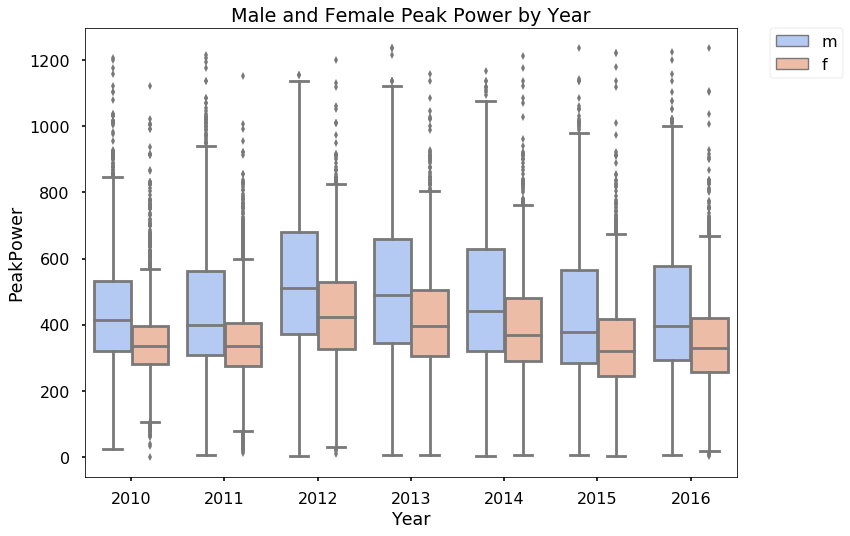

In [63]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.boxplot(x='Year',
            y='PeakPower',
            hue='Sex',
            data=df_time,
            palette="coolwarm")

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Male and Female Peak Power by Year')

Text(0.5,1,'Male and Female Energy by Year')

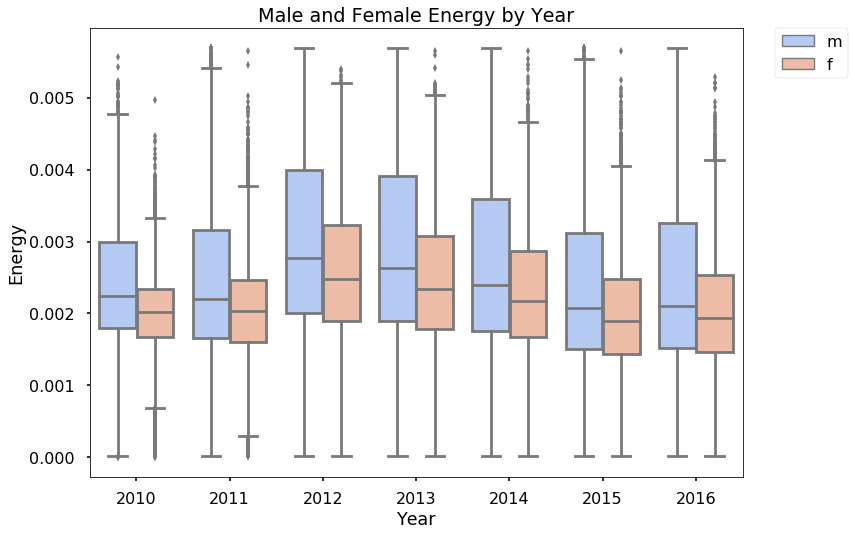

In [64]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.boxplot(x='Year',
            y='Energy',
            hue='Sex',
            data=df_time,
            palette="coolwarm")

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Male and Female Energy by Year')

Text(0.5,1,'Age Distribution')

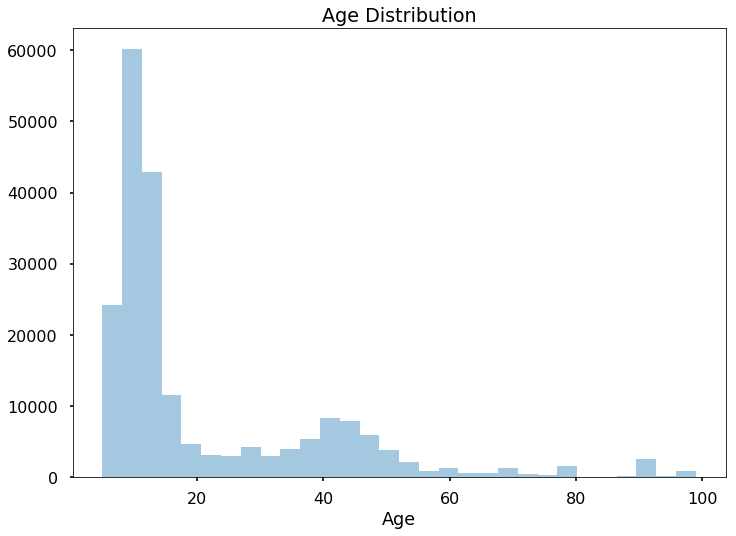

In [41]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.distplot(df_time['Age'], kde=False, bins=30)

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Age Distribution')

In [43]:
df_time.pivot_table(values='PeakPower',index='Month',columns='Year')

Year,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,
1,397.110870,390.017380,497.311809,481.801916,461.649201,426.795031,396.658781
2,387.278519,378.934040,492.563752,454.337907,448.218391,408.168727,389.646170
3,396.622669,368.172943,492.285408,461.700309,426.894767,409.544189,390.580072
4,391.191367,374.928657,371.846626,449.873233,436.541689,371.179921,390.190433
5,395.944497,387.524915,515.152258,448.235392,429.919672,354.867414,387.117895
6,392.211494,383.480514,492.672438,451.014550,425.185159,354.489087,382.880347
7,401.515680,393.298750,496.202296,462.190234,438.580640,364.437384,391.106595
8,392.969779,386.392718,491.037034,461.604720,429.339715,351.954282,389.608311
9,384.331958,381.386652,493.025631,474.731113,421.129970,387.025238,388.705725


Text(0.5,1,'Peak Power By Month and Year')

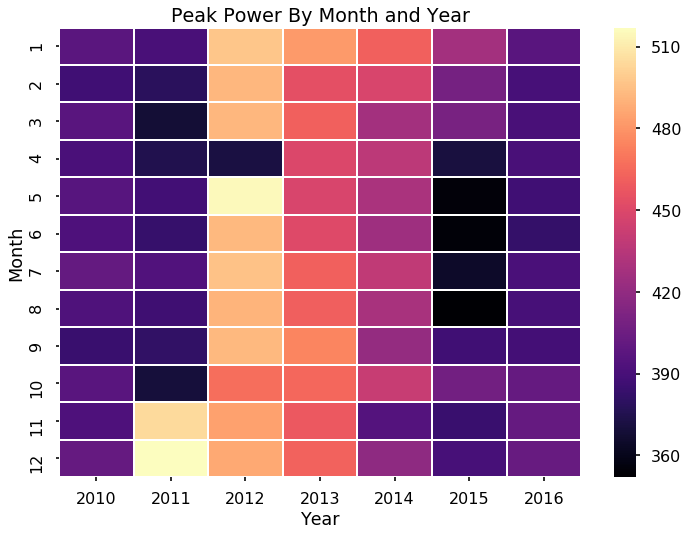

In [44]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.heatmap(df_time.pivot_table(values='PeakPower',index='Month',columns='Year'),
            cmap="magma",
            linecolor='white',
            linewidths=1)

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Peak Power By Month and Year')

In [45]:
# Create data
df.groupby([df.DateIndex.dt.year])['Energy'].agg(['sum'])

,sum
DateIndex,
2010,72.09037
2011,67.00448
2012,76.05665
2013,86.59393
2014,70.80951
2015,55.80870
2016,63.36048


In [46]:
df_totalenergy_year

NameError: name 'df_totalenergy_year' is not defined

Text(0.5,1,'Total Energy by Year and Sex')

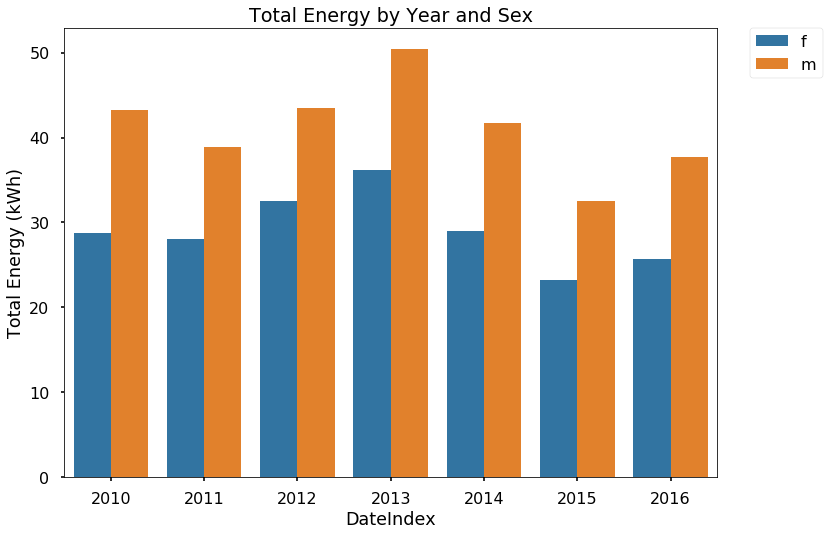

In [65]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.barplot(x='DateIndex',y='Total Energy (kWh)',hue='Sex',data=df_year_sex_energy.reset_index())

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Total Energy by Year and Sex')

In [48]:
# TODO - Writeup of findings

# Findings

In [50]:
# Total Energy produced
total_energy = df['Energy'].sum()
total_energy

491.72412000000116

In [52]:
# Total Energy Breakdown by Gender
df.groupby('Sex')['Energy'].sum()

Sex
f    203.51135
m    288.21277
Name: Energy, dtype: float64

In [53]:
df.groupby('Sex')['Energy'].sum() / total_energy

Sex
f    0.413873
m    0.586127
Name: Energy, dtype: float64

In [54]:
# Total Energy Breakdown by Age
df_ages = pd.DataFrame(df.groupby('Age')['Energy'].sum().sort_values(ascending=False))
df_ages['Percentage of Total'] = df.groupby('Age')['Energy'].sum().sort_values(ascending=False) / total_energy
df_ages['Session Count'] = df['Age'].value_counts()
df_ages

,Energy,Percentage of Total,Session Count
Age,,,
10,45.95549,0.093458,24412
12,42.26415,0.085951,18411
11,41.78223,0.084971,19985
13,36.42114,0.074068,14348
9,27.89647,0.056732,15801
14,27.67592,0.056283,10128
15,17.46499,0.035518,5988
8,17.43457,0.035456,10880
7,10.43247,0.021216,7256


# Potential

In [105]:
pot_df= df.copy()
# Converting EnergyKWH to Energy in Watts, Since there are some really bad outliers, its best to convert energy in KWH to Power in watts 
# Using formula P(W) = 1000 × E(kWh) / t(hr), Lets consider that they work out only for 30 mins
pot_df['PotPowerin30minsWatts'] = ((pot_df['Energy']/0.0083)*1000)/2
pot_df['PotPower4DaysWorkout'] = pot_df['PotPowerin30minsWatts']*4
pot_df.head()

,Session ID,Session Start Time,User ID,Sex,Age,PeakPower,Energy,DateIndex,PotPowerin30minsWatts,PotPower4DaysWorkout
DateIndex,,,,,,,,,,
2010-01-01,89677,2010-01-01 10:14:00,17696,m,14,324.81,0.00194,2010-01-01,116.867470,467.469880
2010-01-01,89678,2010-01-01 10:16:00,17697,f,14,291.89,0.00204,2010-01-01,122.891566,491.566265
2010-01-01,89679,2010-01-01 10:18:00,17698,f,46,321.14,0.00237,2010-01-01,142.771084,571.084337
2010-01-01,89685,2010-01-01 10:27:00,17701,f,38,396.33,0.00243,2010-01-01,146.385542,585.542169
2010-01-01,89688,2010-01-01 10:30:00,17703,m,46,375.04,0.00288,2010-01-01,173.493976,693.975904


In [106]:
pot_df.groupby('Sex')['PotPower4DaysWorkout'].mean()

Sex
f    525.412813
m    622.787121
Name: PotPower4DaysWorkout, dtype: float64

In [108]:
pot_df.groupby('Age')['PotPower4DaysWorkout'].mean().sort_values(ascending=False)

Age
47    833.312112
45    816.609132
46    816.456962
48    816.199513
44    815.046854
43    813.695526
41    810.188954
49    809.253087
42    807.057230
25    802.228319
27    802.174200
26    801.031634
29    791.818018
28    788.276529
38    785.251787
51    784.816521
39    784.798952
34    784.642570
36    781.890703
24    781.359446
35    779.946231
33    778.750986
23    777.606762
32    776.023596
31    775.950811
37    772.449116
52    767.875924
40    762.031274
22    753.100551
53    748.144410
         ...    
11    503.778195
85    490.304073
93    474.207032
99    469.807728
86    458.634538
60    456.669029
82    453.888280
10    453.613471
94    439.205471
79    438.416523
95    437.314974
81    430.378657
78    430.148501
9     425.418705
87    418.516170
96    417.714100
77    413.952585
90    411.918675
89    410.350493
91    407.913134
98    401.965758
92    399.082042
88    397.826601
70    389.906495
8     386.130625
80    370.239550
97    364.859438
7     346.

In [109]:
data_appl = 'appliances.csv'
df_appl = pd.read_csv(data_appl,delimiter=',')

In [110]:
df_appl.head()

,Appliance,PowerNeeded
0,Air conditioner 1 room,1100
1,Air conditioner central,5000
2,Amplifier,20-70
3,Automatic defrost,700
4,Band saw,1100


In [ ]:
# To Do Build the potential charts for various time slices and attach it to the appliances, Also need to attach the cost for each appliance
# to show how much cost will be saved by using the power generated by biking rather than through grid electricity.

In [ ]:
# Redo some of the Visuals in plotly for interactive and better features.